In [1]:
import sys
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# from collections import Counter
# from itertools import product

In [2]:
print("Python Version: {}\n".format(sys.version))
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("matplotlib Version: {}".format(matplotlib.__version__))

Python Version: 3.5.4 |Anaconda, Inc.| (default, Nov  8 2017, 18:11:28) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

Pandas Version: 0.22.0
Numpy Version: 1.14.0
matplotlib Version: 2.1.2


In [3]:
films1 = pd.read_excel("1000GreatestFilms.xls")
# films2 = pd.read_excel("Films-Ranked-1001-2000.xls")

In [4]:
films1.head(10)

,Pos,2017,2016,Title,Director,Year,Country,Length,Genre,Colour
0,1,1,1,Citizen Kane,"Welles, Orson",1941,USA,119,Drama-Mystery,BW
1,2,2,2,Vertigo,"Hitchcock, Alfred",1958,USA,128,Thriller-Drama-Mystery,Col
2,3,3,3,2001: A Space Odyssey,"Kubrick, Stanley",1968,UK-USA,139,Science Fiction,Col
3,4,4,5,"Rules of the Game, The","Renoir, Jean",1939,France,113,Drama-Comedy,BW
4,5,5,4,Tokyo Story,"Ozu, Yasujiro",1953,Japan,134,Drama,BW
5,6,7,6,"Godfather, The","Coppola, Francis Ford",1972,USA,175,Drama-Crime,Col
6,7,6,7,8½,"Fellini, Federico",1963,Italy,135,Drama,BW
7,8,8,8,Sunrise,"Murnau, F.W.",1927,USA,110,Romance-Drama-Crime,BW
8,9,9,10,"Searchers, The","Ford, John",1956,USA,119,Western,Col
9,10,10,9,Seven Samurai,"Kurosawa, Akira",1954,Japan,200,Drama-Action-History,BW


In [5]:
films1.sample(10)

,Pos,2017,2016,Title,Director,Year,Country,Length,Genre,Colour
910,911,904,866,"Ballad of Narayama, The","Imamura, Shohei",1983,Japan,130,Drama,Col
195,196,210,223,"Thin Red Line, The","Malick, Terrence",1998,USA,170,War-Drama-Action,Col
566,567,579,520,Ben-Hur,"Wyler, William",1959,USA,212,Religious-History,Col
563,564,597,618,Songs from the Second Floor,"Andersson, Roy",2000,Sweden-France-Denmark-Norway-Germany,98,Drama,Col
196,197,192,248,"Quiet Man, The","Ford, John",1952,USA,129,Romance-Drama-Comedy,Col
251,252,247,282,Three Colours: Red,"Kieslowski, Krzysztof",1994,France-Switzerland-Poland,99,Drama,Col
8,9,9,10,"Searchers, The","Ford, John",1956,USA,119,Western,Col
27,28,31,32,Some Like it Hot,"Wilder, Billy",1959,USA,119,Romance-Crime-Comedy,BW
183,184,197,199,Belle de jour,"Buñuel, Luis",1967,France-Italy,100,Drama,Col
890,891,834,749,"Posto, Il","Olmi, Ermanno",1961,Italy,93,Drama,BW


In [6]:
films1.tail(10)

,Pos,2017,2016,Title,Director,Year,Country,Length,Genre,Colour
990,991,959,858,Unsere Afrikareise,"Kubelka, Peter",1966,Austria,13,Short,Col
991,992,980,835,"Nightmare Before Christmas, The","Selick, Henry",1993,USA,76,Family-Fantasy-Animated,Col
992,993,---,---,They Live,"Carpenter, John",1988,USA,93,Science Fiction-Thriller-Action,Col
993,994,943,798,Heimat,"Reitz, Edgar",1984,West Germany,940,Drama,Col-BW
994,995,---,---,In Praise of Love,"Godard, Jean-Luc",2001,France,97,Drama,Col-BW
995,996,991,---,Dead Poets Society,"Weir, Peter",1989,USA,128,Drama,Col
996,997,---,---,Husbands and Wives,"Allen, Woody",1992,USA,107,Drama,Col
997,998,998,---,"Humanité, L'","Dumont, Bruno",1999,France,147,Drama,Col
998,999,995,---,Oasis,Lee Chang-dong,2002,South Korea,133,Romance-Drama,Col
999,1000,---,---,Sorcerer,"Friedkin, William",1977,USA,121,Adventure-Drama-Thriller,Col


## Clean Data Types

### Set the data types of column names to "string"

In [7]:
films1.columns

Index([     'Pos',       2017,       2016,    'Title', 'Director',     'Year',
        'Country',   'Length',    'Genre',   'Colour'],
      dtype='object')

Note that the `dtype` of the `columns` is still `object` after `astype` tranformation. For a array of string with different lengths, the current recommended way is to use `object` as `dtype`.

In [8]:
films1.columns = films1.columns.astype(str)
films1.rename(index=str, columns={"Pos":"Rank2018", "2017":"Rank2017", "2016":"Rank2016"}, inplace=True)
films1.columns

Index(['Rank2018', 'Rank2017', 'Rank2016', 'Title', 'Director', 'Year',
       'Country', 'Length', 'Genre', 'Colour'],
      dtype='object')

In [9]:
films1.dtypes

Rank2018     int64
Rank2017    object
Rank2016    object
Title       object
Director    object
Year         int64
Country     object
Length       int64
Genre       object
Colour      object
dtype: object

In [10]:
def check_dtype(df):
    for col in df.columns:
        dtype_names, dtype_counts = np.unique([type(x).__name__ for x in df[col]], return_counts=True)
        print("{} unique dtypes in column '{}':".format(len(dtype_names), col))
        pairs = zip(dtype_names,dtype_counts)
        for p in pairs:
            print("{} rows with dtype '{}'".format(p[1], p[0]))
            values, counts = np.unique([x for x in df[col] if type(x).__name__ == p[0]], return_counts=True)

            if len(values) <= 10:
                print("    {} unique values {} with dtype '{}'".format(len(values),values, p[0]))
            else:
                print("    {} unique values with dtype '{}'".format( len(values), p[0]))
        print("\n")

In [11]:
check_dtype(films1)

1 unique dtypes in column 'Rank2018':
1000 rows with dtype 'int'
    1000 unique values with dtype 'int'


2 unique dtypes in column 'Rank2017':
963 rows with dtype 'int'
    963 unique values with dtype 'int'
37 rows with dtype 'str'
    1 unique values ['---'] with dtype 'str'


2 unique dtypes in column 'Rank2016':
930 rows with dtype 'int'
    930 unique values with dtype 'int'
70 rows with dtype 'str'
    1 unique values ['---'] with dtype 'str'


2 unique dtypes in column 'Title':
2 rows with dtype 'int'
    2 unique values [1900 2046] with dtype 'int'
998 rows with dtype 'str'
    994 unique values with dtype 'str'


1 unique dtypes in column 'Director':
1000 rows with dtype 'str'
    421 unique values with dtype 'str'


1 unique dtypes in column 'Year':
1000 rows with dtype 'int'
    97 unique values with dtype 'int'


1 unique dtypes in column 'Country':
1000 rows with dtype 'str'
    146 unique values with dtype 'str'


1 unique dtypes in column 'Length':
1000 rows with dtype

In [12]:
# fix anomalous dtypes and save memory usage by switching to "shorter" dtypes

# Use 9999 as "missing" because:
# 1. Numpy doesn't support NaN for integers
# 2. The "missing value" in both "Rank2017" and "Rank2016" indicate
#    the rankings are below 1000 (>1000), only censored
films1.loc[films1["Rank2017"]=="---", "Rank2017"] = 9999
films1.loc[films1["Rank2016"]=="---", "Rank2016"] = 9999
films1["Title"] = films1["Title"].astype(str)
films1["Rank2018"] = films1["Rank2018"].astype(np.uint16)
films1["Rank2017"] = films1["Rank2017"].astype(np.uint16)
films1["Rank2016"] = films1["Rank2016"].astype(np.uint16)
films1["Year"] = films1["Year"].astype(np.uint16)
films1["Length"] = films1["Length"].astype(np.uint16)

In [13]:
films1.dtypes

Rank2018    uint16
Rank2017    uint16
Rank2016    uint16
Title       object
Director    object
Year        uint16
Country     object
Length      uint16
Genre       object
Colour      object
dtype: object

In [14]:
check_dtype(films1)

1 unique dtypes in column 'Rank2018':
1000 rows with dtype 'int'
    1000 unique values with dtype 'int'


1 unique dtypes in column 'Rank2017':
1000 rows with dtype 'int'
    964 unique values with dtype 'int'


1 unique dtypes in column 'Rank2016':
1000 rows with dtype 'int'
    931 unique values with dtype 'int'


1 unique dtypes in column 'Title':
1000 rows with dtype 'str'
    996 unique values with dtype 'str'


1 unique dtypes in column 'Director':
1000 rows with dtype 'str'
    421 unique values with dtype 'str'


1 unique dtypes in column 'Year':
1000 rows with dtype 'int'
    97 unique values with dtype 'int'


1 unique dtypes in column 'Country':
1000 rows with dtype 'str'
    146 unique values with dtype 'str'


1 unique dtypes in column 'Length':
1000 rows with dtype 'int'
    179 unique values with dtype 'int'


1 unique dtypes in column 'Genre':
1000 rows with dtype 'str'
    322 unique values with dtype 'str'


1 unique dtypes in column 'Colour':
1000 rows with dtype 's

In [15]:
films1.head(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
0,1,1,1,Citizen Kane,"Welles, Orson",1941,USA,119,Drama-Mystery,BW
1,2,2,2,Vertigo,"Hitchcock, Alfred",1958,USA,128,Thriller-Drama-Mystery,Col
2,3,3,3,2001: A Space Odyssey,"Kubrick, Stanley",1968,UK-USA,139,Science Fiction,Col
3,4,4,5,"Rules of the Game, The","Renoir, Jean",1939,France,113,Drama-Comedy,BW
4,5,5,4,Tokyo Story,"Ozu, Yasujiro",1953,Japan,134,Drama,BW
5,6,7,6,"Godfather, The","Coppola, Francis Ford",1972,USA,175,Drama-Crime,Col
6,7,6,7,8½,"Fellini, Federico",1963,Italy,135,Drama,BW
7,8,8,8,Sunrise,"Murnau, F.W.",1927,USA,110,Romance-Drama-Crime,BW
8,9,9,10,"Searchers, The","Ford, John",1956,USA,119,Western,Col
9,10,10,9,Seven Samurai,"Kurosawa, Akira",1954,Japan,200,Drama-Action-History,BW


In [16]:
films1.sample(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
253,254,253,258,"Ivan the Terrible, Part 1","Eisenstein, Sergei",1944,USSR,96,History-Drama-Biography,BW
594,595,724,821,Arrebato,"Zulueta, Iván",1979,Spain,105,Drama-Horror,Col
864,865,853,656,Othello,"Welles, Orson",1952,Italy-France-Morocco-USA,90,Drama,BW
382,383,382,368,High and Low,"Kurosawa, Akira",1963,Japan,142,Thriller-Crime-Drama,BW
923,924,9999,9999,Sholay,"Sippy, Ramesh",1975,India,162,Action-Drama-Musical,Col
180,181,179,170,"Last Laugh, The","Murnau, F.W.",1924,Germany,77,Drama,BW
170,171,175,173,Earth,"Dovzhenko, Alexander",1930,USSR,75,Drama,BW
546,547,511,584,Our Hospitality,"Keaton, Buster/John G. Blystone",1923,USA,74,Comedy-Family-Romance,BW
841,842,860,885,Two English Girls,"Truffaut, François",1971,France,108,Drama,Col
516,517,501,482,Barton Fink,"Coen, Joel & Ethan Coen",1991,USA,117,Drama-Comedy,Col


In [17]:
films1.tail(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
990,991,959,858,Unsere Afrikareise,"Kubelka, Peter",1966,Austria,13,Short,Col
991,992,980,835,"Nightmare Before Christmas, The","Selick, Henry",1993,USA,76,Family-Fantasy-Animated,Col
992,993,9999,9999,They Live,"Carpenter, John",1988,USA,93,Science Fiction-Thriller-Action,Col
993,994,943,798,Heimat,"Reitz, Edgar",1984,West Germany,940,Drama,Col-BW
994,995,9999,9999,In Praise of Love,"Godard, Jean-Luc",2001,France,97,Drama,Col-BW
995,996,991,9999,Dead Poets Society,"Weir, Peter",1989,USA,128,Drama,Col
996,997,9999,9999,Husbands and Wives,"Allen, Woody",1992,USA,107,Drama,Col
997,998,998,9999,"Humanité, L'","Dumont, Bruno",1999,France,147,Drama,Col
998,999,995,9999,Oasis,Lee Chang-dong,2002,South Korea,133,Romance-Drama,Col
999,1000,9999,9999,Sorcerer,"Friedkin, William",1977,USA,121,Adventure-Drama-Thriller,Col


## Column Summary

In [18]:
films1.describe()

,Rank2018,Rank2017,Rank2016,Year,Length
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000
mean,500.500000,836.132000,1135.9170,1968.46000,118.534000
std,288.819436,1818.026589,2447.0971,21.91992,62.570999
min,1.000000,1.000000,1.0000,1895.00000,1.000000
25%,250.750000,250.750000,250.7500,1953.00000,93.000000
50%,500.500000,500.500000,500.5000,1969.00000,109.000000
75%,750.250000,751.250000,752.2500,1986.00000,129.000000
max,1000.000000,9999.000000,9999.0000,2011.00000,940.000000


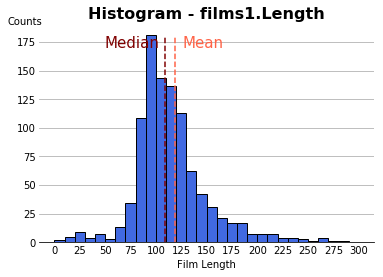

In [19]:
mean_length = np.nanmean(films1['Length'])
median_length = np.nanmedian(films1['Length'])
min_length = np.nanmin(films1['Length'])
max_length = np.nanmax(films1['Length'])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)
ax.set_axisbelow(True) # move axis elements (including grids) at the most underneath layer
ax.hist(films1['Length'], bins=30, range=(0,300), edgecolor='black', color='royalblue')
ax.set_xticks(np.arange(0, np.max(films1["Length"]), 25))
ax.tick_params(length=0)
ax.vlines(x=mean_length, ymin=0, ymax=ax.get_ylim()[1]-10, colors='tomato', linestyles='--')
ax.text(mean_length+8, ax.get_ylim()[1]-20, 'Mean', color='tomato', fontsize=15)
ax.vlines(x=median_length, ymin=0, ymax=ax.get_ylim()[1]-10, colors='maroon', linestyles='--')
ax.text(median_length-60, ax.get_ylim()[1]-20, 'Median', color='maroon', fontsize=15)
ax.set_title('Histogram - films1.Length', loc='center', fontweight='semibold', fontsize=16)
ax.set_xlabel('Film Length')
ax.text(ax.get_xlim()[0]-0.1*(ax.get_xlim()[1]), ax.get_ylim()[1], 'Counts')
plt.savefig('TSPDT1000LengthHist.png', format='png', dpi=300)
plt.show()

## Cross-Column Analysis

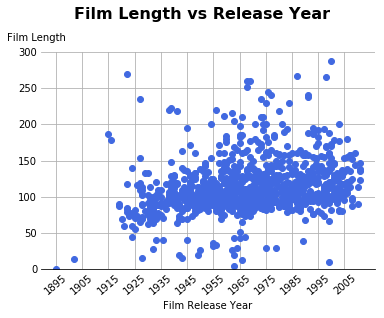

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)
ax.set_axisbelow(True) # move axis elements (including grids) at the most underneath layer
ax.scatter(films1['Year'], films1['Length'], color='royalblue')
ax.set_ylim((0,300))
ax.set_xticks(np.arange(np.min(films1["Year"]), np.max(films1["Year"]), 10))
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
    tick.set_horizontalalignment('center')
ax.tick_params(length=0)
ax.text(x=0.1, y=1.15, s='Film Length vs Release Year', fontweight='semibold', fontsize=16, transform=ax.transAxes)
ax.set_xlabel('Film Release Year')
ax.text(x=-0.1, y=1.05, s='Film Length', transform=ax.transAxes)
plt.savefig('TSPDT1000LengthVSYear.png', format='png', dpi=300)
plt.show()

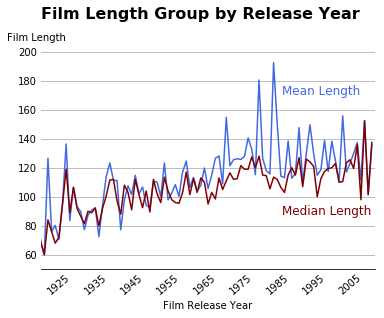

In [21]:
GroupByYr = films1.groupby('Year')
avg_len_yr = GroupByYr['Length'].mean()
mdn_len_yr = GroupByYr['Length'].median()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)
ax.set_axisbelow(True) # move axis elements (including grids) at the most underneath layer
line1 = ax.plot(avg_len_yr.index, avg_len_yr.values, color='royalblue')
line1 = ax.plot(mdn_len_yr.index, mdn_len_yr.values, color='maroon')
ax.set_xticks(np.arange(np.min(films1["Year"]), np.max(films1["Year"]), 10))
ax.set_xlim((1920, np.max(films1["Year"])+1))
ax.set_ylim((50, 200))
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
    tick.set_horizontalalignment('center')
ax.tick_params(length=0)
ax.text(x=0, y=1.15, s='Film Length Group by Release Year', fontweight='semibold', fontsize=16, transform=ax.transAxes)
ax.set_xlabel('Film Release Year')
ax.text(x=-0.1, y=1.05, s='Film Length', transform=ax.transAxes)
ax.text(x=0.72, y=0.8, s='Mean Length', color='royalblue', fontsize=12, transform=ax.transAxes)
ax.text(x=0.72, y=0.25, s='Median Length', color='maroon', fontsize=12, transform=ax.transAxes)
plt.savefig('TSPDT1000LengthGBYear.png', format='png', dpi=300)
plt.show()

## Unique, Count and Sort

In [22]:
sorted_films1 = films1.sort_values(by=["Director", "Year"])

In [23]:
sorted_films1.head(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
719,720,884,9999,Airplane!,"Abrahams, Jim/David Zucker/Jerry Zucker",1980,USA,86,Comedy,Col
95,96,98,95,"Jeanne Dielman, 23 Quai du Commerce, 1080 Brux...","Akerman, Chantal",1975,Belgium-France,201,Drama-Avant-Garde,Col
860,861,858,938,News from Home,"Akerman, Chantal",1976,France-Belgium-West Germany,85,Drama,Col
330,331,344,359,Kiss Me Deadly,"Aldrich, Robert",1955,USA,106,Crime-Thriller-Drama,BW
880,881,888,9999,Love and Death,"Allen, Woody",1975,USA,82,War-Comedy,Col
85,86,91,83,Annie Hall,"Allen, Woody",1977,USA,94,Romance-Comedy,Col
105,106,110,110,Manhattan,"Allen, Woody",1979,USA,96,Romance-Comedy,BW
657,658,670,675,Zelig,"Allen, Woody",1983,USA,79,Comedy,Col-BW
609,610,643,590,"Purple Rose of Cairo, The","Allen, Woody",1985,USA,82,Fantasy-Comedy-Romance,Col-BW
518,519,531,510,Hannah and Her Sisters,"Allen, Woody",1986,USA,106,Drama-Comedy-Romance,Col


In [24]:
sorted_films1.sample(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
875,876,837,849,Grave of the Fireflies,"Takahata, Isao",1988,Japan,93,Animated-War-Drama,Col
588,589,581,465,"Red Circle, The","Melville, Jean-Pierre",1970,France-Italy,150,Thriller-Crime,Col
135,136,135,136,"Chien andalou, Un","Buñuel, Luis",1928,France,16,Horror-Fantasy-Avant-Garde,BW
553,554,582,574,Splendor in the Grass,"Kazan, Elia",1961,USA,124,Drama,Col
789,790,779,778,Seventh Heaven,"Borzage, Frank",1927,USA,119,Romance-Drama-War,BW
174,175,183,167,"Great Dictator, The","Chaplin, Charles",1940,USA,128,War-Comedy-Political,BW
579,580,558,476,Fellini Satyricon,"Fellini, Federico",1969,Italy,129,History-Drama,Col
165,166,166,166,"Grapes of Wrath, The","Ford, John",1940,USA,129,Drama,BW
394,395,408,444,Heaven's Gate,"Cimino, Michael",1980,USA,219,Western-Drama-History,Col
119,120,115,128,Madame de...,"Ophüls, Max",1953,France-Italy,105,Romance-Drama,BW


In [25]:
sorted_films1.tail(10)

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
468,469,438,490,"Scarlet Empress, The","von Sternberg, Josef",1934,USA,110,History-Drama-Biography,BW
912,913,905,837,Anatahan,"von Sternberg, Josef",1953,Japan,92,War-Drama,BW
613,614,612,648,Foolish Wives,"von Stroheim, Erich",1922,USA,117,Drama,BW
91,92,88,100,Greed,"von Stroheim, Erich",1924,USA,140,Drama,BW
524,525,495,564,"Wedding March, The","von Stroheim, Erich",1928,USA,113,Romance-Drama,BW
210,211,199,219,Breaking the Waves,"von Trier, Lars",1996,Denmark-Sweden-France-Netherlands-Norway-Icela...,156,Romance-Drama,Col
723,724,699,609,"Idiots, The","von Trier, Lars",1998,Denmark-Spain-Sweden-France-Netherlands-Italy,117,Drama-Comedy,Col
602,603,644,600,Dancer in the Dark,"von Trier, Lars",2000,Denmark-France-Sweden-Italy-Germany-Norway-Net...,140,Musical-Drama,Col
380,381,412,671,Dogville,"von Trier, Lars",2003,Denmark-Sweden-France-UK-Germany-Finland-Italy...,177,Drama,Col
499,500,486,694,Melancholia,"von Trier, Lars",2011,Denmark-Sweden-France-Germany,136,Drama-Science Fiction,Col


In [26]:
df_drctr1 = pd.DataFrame()
df_drctr1["Director"], df_drctr1["CountIn1000"] = np.unique(films1["Director"], return_counts=True)

The following two cells show two strategies appending elements onto an array (or list). The `np.array` is used in the first one, while python `list` is used the the second one. As one can see, the speed is the same, while `list` approach has the advantage of not having to specify the length in the first place.

In [27]:
start_time = time.time()
lst_yr = np.empty(len(films1["Director"]))
fst_yr = np.empty(len(films1["Director"]))

for drctr in df_drctr1["Director"]:
    drctr_yr = films1.loc[films1["Director"] == drctr, "Year"]
    np.append(lst_yr, np.max(drctr_yr))
    np.append(fst_yr, np.min(drctr_yr))
    
# print(lst_yr)
# print(fst_yr)

print("--- {} seconds ---".format(time.time()-start_time))

--- 0.3722097873687744 seconds ---


In [28]:
start_time = time.time()

lst_yr = []
fst_yr = []

for drctr in df_drctr1["Director"]:
    drctr_yr = films1.loc[films1["Director"] == drctr, "Year"]
    
    lst_yr.append(np.max(drctr_yr))
    fst_yr.append(np.min(drctr_yr))

lst_yr = np.array(lst_yr)
fst_yr = np.array(fst_yr)
# print(lst_yr)
# print(fst_yr)

print("--- {} seconds ---".format(time.time()-start_time))

--- 0.3546910285949707 seconds ---


In [29]:
df_drctr1["LastFilmYear"] = lst_yr
df_drctr1["FirstFilmYear"] = fst_yr

In [30]:
df_drctr1_sorted = df_drctr1.sort_values(by=["LastFilmYear","CountIn1000"], ascending=[False, False])

In [31]:
df_drctr1_sorted.head(10)

,Director,CountIn1000,LastFilmYear,FirstFilmYear
226,"Malick, Terrence",5,2011,1973
420,"von Trier, Lars",5,2011,1996
363,"Tarr, Béla",3,2011,1994
102,"Farhadi, Asghar",1,2011,2011
391,"Weerasethakul, Apichatpong",4,2010,2002
134,"Guzmán, Patricio",1,2010,2010
41,"Cameron, James",5,2009,1984
139,"Haneke, Michael",5,2009,1997
233,"Martel, Lucrecia",2,2008,2001
260,"Nolan, Christopher",2,2008,2000


In [32]:
df_drctr1_sorted.sample(10)

,Director,CountIn1000,LastFilmYear,FirstFilmYear
131,"Greenaway, Peter",1,1989,1989
74,"Curtiz, Michael",2,1945,1942
410,"Zinnemann, Fred",2,1966,1952
92,"Duras, Marguerite",1,1975,1975
395,"Whale, James",2,1935,1931
300,"Reisz, Karel",1,1960,1960
203,"Laughton, Charles",1,1955,1955
197,"Kusturica, Emir",2,1995,1989
61,"Clouzot, Henri-Georges",2,1955,1953
319,"Rouch, Jean",2,1958,1955


In [33]:
df_drctr1_sorted.tail(10)

,Director,CountIn1000,LastFilmYear,FirstFilmYear
178,"Keaton, Buster/Clyde Bruckman",1,1926,1926
176,"Keaton, Buster",2,1925,1924
179,"Keaton, Buster/Donald Crisp",1,1924,1924
181,"Keaton, Buster/John G. Blystone",1,1923,1923
54,"Christensen, Benjamin",1,1922,1922
396,"Wiene, Robert",1,1920,1920
132,"Griffith, D.W.",4,1919,1915
107,"Feuillade, Louis",1,1915,1915
257,"Méliès, Georges",1,1902,1902
221,"Lumière, August & Louis Lumière",1,1895,1895


In [34]:
films1.loc[films1["Director"]=="Malick, Terrence",:]

,Rank2018,Rank2017,Rank2016,Title,Director,Year,Country,Length,Genre,Colour
124,125,127,129,Badlands,"Malick, Terrence",1973,USA,95,Drama-Crime,Col
139,140,140,140,Days of Heaven,"Malick, Terrence",1978,USA,95,Romance-Drama,Col
195,196,210,223,"Thin Red Line, The","Malick, Terrence",1998,USA,170,War-Drama-Action,Col
239,240,235,405,"Tree of Life, The","Malick, Terrence",2011,USA,139,Drama,Col
795,796,776,9999,"New World, The","Malick, Terrence",2005,USA,135,Drama-History-Romance,Col
